In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from model_module import model_preparation, best_model

In [280]:
df = pd.read_csv("hindalco.csv").set_index("datetime").drop(columns="timestamp")
df

,open,high,low,close,volume
datetime,,,,,
2024-12-02 09:20:00+05:30,656.20,657.50,653.05,654.85,63159
2024-12-02 09:25:00+05:30,655.00,656.85,654.30,655.80,40282
2024-12-02 09:30:00+05:30,656.00,656.75,655.15,655.75,31136
2024-12-02 09:35:00+05:30,655.50,659.70,655.00,659.55,57052
2024-12-02 09:40:00+05:30,659.60,660.00,657.50,660.00,53719
...,...,...,...,...,...
2025-11-28 15:10:00+05:30,808.70,808.90,808.10,808.30,49614
2025-11-28 15:15:00+05:30,808.30,808.45,807.25,807.65,99826
2025-11-28 15:20:00+05:30,807.65,808.50,807.20,807.75,113559


    Preparing target

In [281]:
df["log_return"] = np.log(df["close"]/df["close"].shift())

    Creating log returns

In [282]:
df = df.copy()

In [283]:
df["log_return_lag_1"] = df["log_return"].shift()
df["log_return_lag_2"] = df["log_return"].shift(2)
df["log_return_lag_3"] = df["log_return"].shift(3)
df = df.dropna(how="any")
df.head()

,open,high,low,close,volume,log_return,log_return_lag_1,log_return_lag_2,log_return_lag_3
datetime,,,,,,,,,
2024-12-02 09:40:00+05:30,659.60,660.00,657.5,660.00,53719,0.000682,0.005778,-0.000076,0.001450
2024-12-02 09:45:00+05:30,659.65,659.95,658.2,659.50,23368,-0.000758,0.000682,0.005778,-0.000076
2024-12-02 09:50:00+05:30,659.40,660.00,658.5,659.30,28900,-0.000303,-0.000758,0.000682,0.005778
2024-12-02 09:55:00+05:30,659.30,659.50,658.5,658.65,18919,-0.000986,-0.000303,-0.000758,0.000682
2024-12-02 10:00:00+05:30,658.60,659.75,658.6,659.50,19097,0.001290,-0.000986,-0.000303,-0.000758


In [284]:
drop_columns = ["open", "high", "low", "close", "log_return", "volume"]
X = df.drop(columns=drop_columns)
y = df["log_return"]

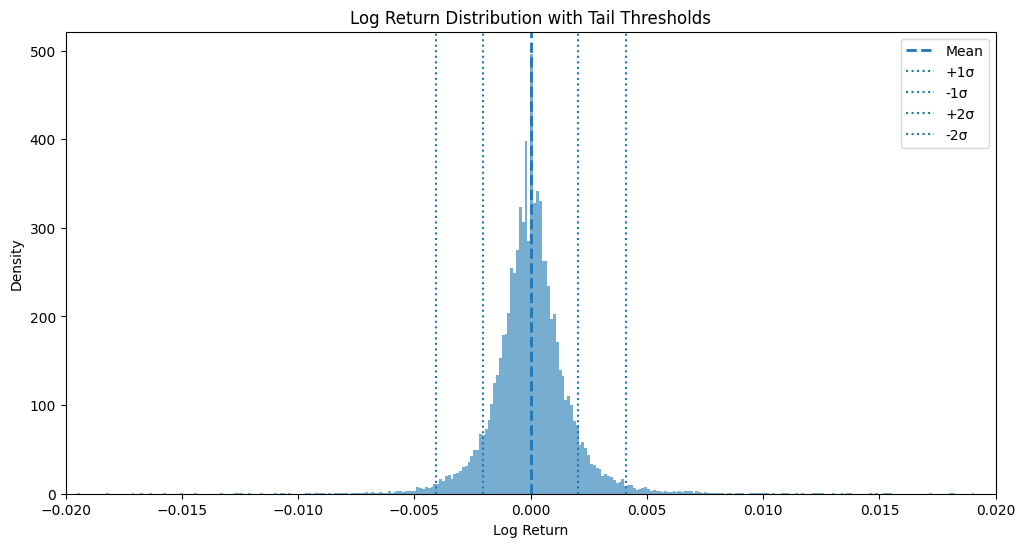

In [285]:

y_clean = y.dropna()

mu = y_clean.mean()
sigma = y_clean.std()

fig, ax = plt.subplots(figsize=(12, 6))

# Histogram
ax.hist(
    y_clean,
    bins=1000,
    density=True,
    alpha=0.6
)
ax.set_xlim(-0.02, 0.02)
# Mean & std lines
ax.axvline(mu, linestyle="--", linewidth=2, label="Mean")
ax.axvline(mu + sigma, linestyle=":", linewidth=1.5, label="+1σ")
ax.axvline(mu - sigma, linestyle=":", linewidth=1.5, label="-1σ")
ax.axvline(mu + 2*sigma, linestyle=":", linewidth=1.5, label="+2σ")
ax.axvline(mu - 2*sigma, linestyle=":", linewidth=1.5, label="-2σ")


ax.set_title("Log Return Distribution with Tail Thresholds")
ax.set_xlabel("Log Return")
ax.set_ylabel("Density")

ax.legend(loc="upper right")
plt.show()


In [286]:
sd1_positive = mu+sigma
sd1_negative= mu-sigma

In [287]:
y = np.where(y < 0, -1, 1)


Test score - 0.49770704073374694
Validation score - 0.5060695980577287
Train score - 1.0
Train confusion matrix - [[5464    0]
 [   0 5656]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      5464
           1       1.00      1.00      1.00      5656

    accuracy                           1.00     11120
   macro avg       1.00      1.00      1.00     11120
weighted avg       1.00      1.00      1.00     11120

Training Accuracy Scores: [0.5264388489208633, 0.5284172661870503, 0.5442446043165468]
Validation Accuracy Scores: [0.5157809549500945, 0.5157809549500945, 0.5082276773671432]


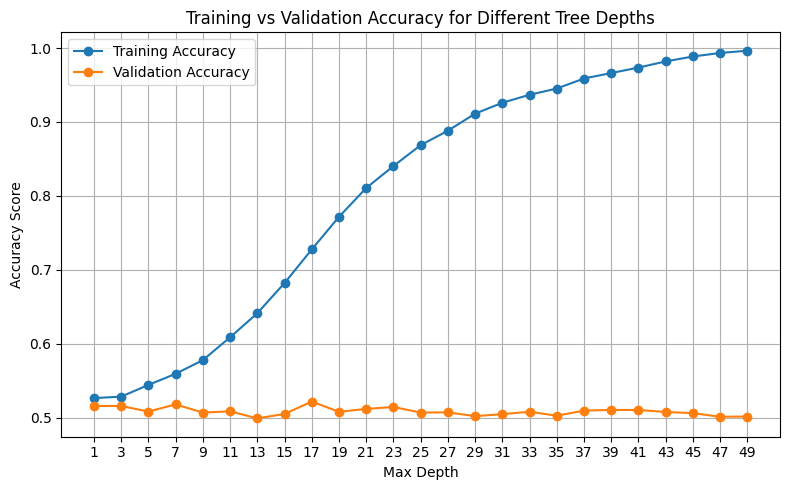

In [288]:
model_preparation(X, y)

In [289]:
best_model(X,y, max_depth=3)

Test score - 0.511734556244942
Validation score - 0.5157809549500945
Validation score - 0.5284172661870503
Train confusion matrix - [[2710 2754]
 [2490 3166]]
              precision    recall  f1-score   support

          -1       0.52      0.50      0.51      5464
           1       0.53      0.56      0.55      5656

    accuracy                           0.53     11120
   macro avg       0.53      0.53      0.53     11120
weighted avg       0.53      0.53      0.53     11120



,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


#### Adding volume feature

In [290]:
df = df.copy()

In [291]:
# Volume Ratio - current volume vs recent average
lookback = 20  # 20 bars = 5 hours of 15min data

df["volume_ma"] = df["volume"].rolling(window=lookback).mean()
df["volume_ratio"] = df["volume"] / df["volume_ma"]

# Clean up
df = df.dropna(how="any")
df.head()

,open,high,low,close,volume,log_return,log_return_lag_1,log_return_lag_2,log_return_lag_3,volume_ma,volume_ratio
datetime,,,,,,,,,,,
2024-12-02 11:15:00+05:30,657.10,657.70,656.75,657.40,20511,0.000456,-0.001521,0.000228,-0.000228,22004.05,0.932147
2024-12-02 11:20:00+05:30,657.55,659.10,657.40,659.00,21042,0.002431,0.000456,-0.001521,0.000228,20370.20,1.032980
2024-12-02 11:25:00+05:30,658.75,658.80,657.95,658.25,5770,-0.001139,0.002431,0.000456,-0.001521,19490.30,0.296045
2024-12-02 11:30:00+05:30,658.25,658.85,658.10,658.60,9402,0.000532,-0.001139,0.002431,0.000456,18515.40,0.507794
2024-12-02 11:35:00+05:30,658.30,659.00,658.25,658.25,14516,-0.000532,0.000532,-0.001139,0.002431,18295.25,0.793430


#### Adding RSI

In [292]:
# RSI calculation
def calculate_rsi(data, period=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Add RSI with standard 14-period
df["rsi_14"] = calculate_rsi(df["close"], period=14)

# Clean up
df = df.dropna(how="any")

# Check the feature
print("RSI Statistics:")
print(df["rsi_14"].describe())
print(f"\nOverbought (>70): {(df['rsi_14'] > 70).sum()} bars")
print(f"Oversold (<30): {(df['rsi_14'] < 30).sum()} bars")


RSI Statistics:
count    18502.000000
mean        50.117263
std         17.192951
min          0.917431
25%         37.872064
50%         50.000000
75%         62.433132
max        100.000000
Name: rsi_14, dtype: float64

Overbought (>70): 2425 bars
Oversold (<30): 2417 bars


In [293]:
df.head()

,open,high,low,close,volume,log_return,log_return_lag_1,log_return_lag_2,log_return_lag_3,volume_ma,volume_ratio,rsi_14
datetime,,,,,,,,,,,,
2024-12-02 12:20:00+05:30,659.35,660.25,659.15,660.15,9491,0.000985,-0.000455,-0.001060,0.003640,13280.05,0.714681,65.536723
2024-12-02 12:25:00+05:30,660.20,661.00,659.80,661.00,37719,0.001287,0.000985,-0.000455,-0.001060,14294.30,2.638744,68.556701
2024-12-02 12:30:00+05:30,661.00,662.00,660.65,661.95,89587,0.001436,0.001287,0.000985,-0.000455,18197.65,4.922998,66.298343
2024-12-02 12:35:00+05:30,662.00,662.75,661.55,662.55,50999,0.000906,0.001436,0.001287,0.000985,20536.55,2.483329,74.157303
2024-12-02 12:40:00+05:30,662.50,662.70,662.25,662.60,29254,0.000075,0.000906,0.001436,0.001287,21762.25,1.344254,73.255814


In [294]:
drop_columns = ["open", "high", "low", "close", "log_return", "volume", "volume_ma"]

X = df.drop(columns=drop_columns)
y = df["log_return"]

y = np.where(y < 0, -1, 1)


Test score - 0.5239124560929479
Validation score - 0.5321621621621622
Train score - 1.0
Train confusion matrix - [[5456    0]
 [   0 5645]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      5456
           1       1.00      1.00      1.00      5645

    accuracy                           1.00     11101
   macro avg       1.00      1.00      1.00     11101
weighted avg       1.00      1.00      1.00     11101

Training Accuracy Scores: [0.5767048013692461, 0.5876047202954688, 0.61300783713179]
Validation Accuracy Scores: [0.5689189189189189, 0.5632432432432433, 0.5775675675675676]


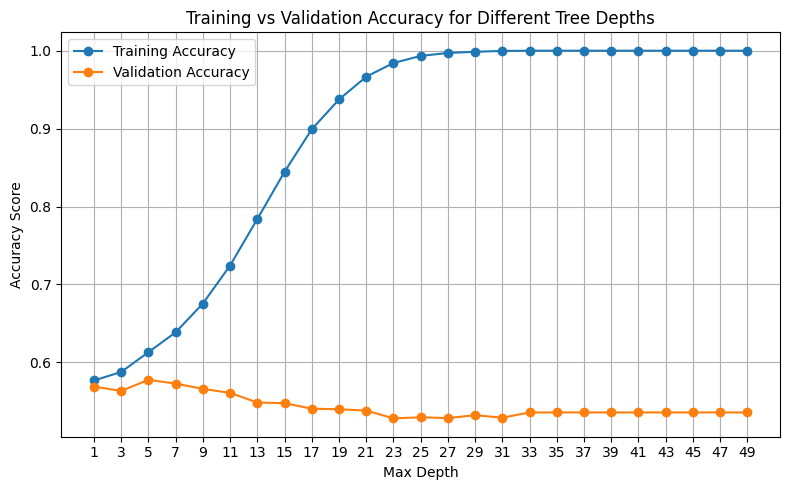

In [295]:
model_preparation(X,y)

In [296]:
model = best_model(X,y, max_depth=5)

Test score - 0.5738989462307484
Validation score - 0.5775675675675676
Validation score - 0.61300783713179
Train confusion matrix - [[3040 2416]
 [1880 3765]]
              precision    recall  f1-score   support

          -1       0.62      0.56      0.59      5456
           1       0.61      0.67      0.64      5645

    accuracy                           0.61     11101
   macro avg       0.61      0.61      0.61     11101
weighted avg       0.61      0.61      0.61     11101



In [297]:
equity_df = pd.DataFrame()
equity_df["y_true"] = y
equity_df["y_pred"] = model.predict(X)
equity_df["log_returns"] = df["log_return"].reset_index(drop=True)
y_proba = model.predict_proba(X)

In [298]:
print(equity_df.head())

   y_true  y_pred  log_returns
0       1       1     0.000985
1       1       1     0.001287
2       1       1     0.001436
3       1       1     0.000906
4       1       1     0.000075


In [299]:
# Step 1: Position based on prediction
equity_df['position'] = equity_df['y_pred']

# Step 2: Calculate P&L for each independent $100 trade
# position * log_return * capital
equity_df['pnl'] = equity_df['position'] * equity_df['log_returns'] * 100

# Step 3: Calculate cumulative P&L (simple sum, not compounding)
equity_df['cumulative_pnl'] = equity_df['pnl'].cumsum()

# Step 4: Equity curve (starting capital + cumulative P&L)
equity_df['equity'] = 100 + equity_df['cumulative_pnl']

# Summary statistics
total_trades = len(equity_df)
winning_trades = (equity_df['pnl'] > 0).sum()
losing_trades = (equity_df['pnl'] < 0).sum()

print(f"\n{'='*50}")
print(f"PERFORMANCE SUMMARY")
print(f"{'='*50}")
print(f"Total trades: {total_trades}")
print(f"Winning trades: {winning_trades}")
print(f"Losing trades: {losing_trades}")
print(f"Win rate: {winning_trades / total_trades * 100:.2f}%")
print(f"\nTotal P&L: ${equity_df['pnl'].sum():.2f}")
print(f"Final equity: ${equity_df['equity'].iloc[-1]:.2f}")
print(f"\nAvg win: ${equity_df[equity_df['pnl'] > 0]['pnl'].mean():.2f}")
print(f"Avg loss: ${equity_df[equity_df['pnl'] < 0]['pnl'].mean():.2f}")
print(f"Profit factor: {abs(equity_df[equity_df['pnl'] > 0]['pnl'].sum() / equity_df[equity_df['pnl'] < 0]['pnl'].sum()):.2f}")
print(f"\nSharpe Ratio: {equity_df['pnl'].mean() / equity_df['pnl'].std() * np.sqrt(252):.2f}")
print(f"Max Drawdown: ${(equity_df['equity'].cummax() - equity_df['equity']).max():.2f}")



PERFORMANCE SUMMARY
Total trades: 18502
Winning trades: 10730
Losing trades: 7185
Win rate: 57.99%

Total P&L: $698.42
Final equity: $798.42

Avg win: $0.13
Avg loss: $-0.10
Profit factor: 1.94

Sharpe Ratio: 2.98
Max Drawdown: $3.44


In [300]:
# Step 1: Position based on prediction
equity_df['position'] = equity_df['y_pred']

# Step 2: Transaction costs - only when position changes (round trip)
TRANSACTION_COST_PCT = 0.0004  # 0.04% per round trip

# Detect position changes (entry/exit = round trip)
equity_df['position_change'] = equity_df['position'].diff().fillna(equity_df['position']).abs()

# Cost applied per $100 position when trade happens
equity_df['transaction_cost'] = equity_df['position_change'] * 100 * TRANSACTION_COST_PCT

# Step 3: Calculate P&L for each independent $100 trade
equity_df['pnl_gross'] = equity_df['position'] * equity_df['log_returns'] * 100
equity_df['pnl_net'] = equity_df['pnl_gross'] - equity_df['transaction_cost']

# Step 4: Calculate cumulative P&L (simple sum, not compounding)
equity_df['cumulative_pnl'] = equity_df['pnl_net'].cumsum()

# Step 5: Equity curve (starting capital + cumulative P&L)
equity_df['equity'] = 100 + equity_df['cumulative_pnl']

# Summary statistics
total_trades = (equity_df['position_change'] > 0).sum()  # Actual trades (position changes)
total_bars = len(equity_df)
winning_trades = (equity_df['pnl_net'] > 0).sum()
losing_trades = (equity_df['pnl_net'] < 0).sum()

total_gross_pnl = equity_df['pnl_gross'].sum()
total_costs = equity_df['transaction_cost'].sum()
total_net_pnl = equity_df['pnl_net'].sum()

print(f"\n{'='*50}")
print(f"PERFORMANCE SUMMARY")
print(f"{'='*50}")
print(f"Total bars: {total_bars}")
print(f"Total trades (position changes): {total_trades}")
print(f"Winning bars: {winning_trades}")
print(f"Losing bars: {losing_trades}")
print(f"Win rate: {winning_trades / total_bars * 100:.2f}%")
print(f"\nGross P&L: ${total_gross_pnl:.2f}")
print(f"Transaction costs: ${total_costs:.2f} ({total_costs/abs(total_gross_pnl)*100:.2f}% of gross)")
print(f"Net P&L: ${total_net_pnl:.2f}")
print(f"Final equity: ${equity_df['equity'].iloc[-1]:.2f}")
print(f"Net Return: {total_net_pnl:.2f}%")
print(f"\nAvg win: ${equity_df[equity_df['pnl_net'] > 0]['pnl_net'].mean():.2f}")
print(f"Avg loss: ${equity_df[equity_df['pnl_net'] < 0]['pnl_net'].mean():.2f}")

total_wins = equity_df[equity_df['pnl_net'] > 0]['pnl_net'].sum()
total_losses = abs(equity_df[equity_df['pnl_net'] < 0]['pnl_net'].sum())
profit_factor = (total_wins / total_losses) if total_losses > 0 else np.inf

print(f"Profit factor: {profit_factor:.2f}")
print(f"\nSharpe Ratio: {equity_df['pnl_net'].mean() / equity_df['pnl_net'].std() * np.sqrt(252 * 75):.2f}")

drawdown = equity_df['equity'].cummax() - equity_df['equity']
max_dd = drawdown.max()
max_dd_pct = (max_dd / equity_df['equity'].cummax()[drawdown.idxmax()]) * 100

print(f"Max Drawdown: ${max_dd:.2f} ({max_dd_pct:.2f}%)")
print(f"{'='*50}\n")


PERFORMANCE SUMMARY
Total bars: 18502
Total trades (position changes): 7608
Winning bars: 8692
Losing bars: 9471
Win rate: 46.98%

Gross P&L: $698.42
Transaction costs: $608.60 (87.14% of gross)
Net P&L: $89.82
Final equity: $189.82
Net Return: 89.82%

Avg win: $0.13
Avg loss: $-0.11
Profit factor: 1.08

Sharpe Ratio: 3.28
Max Drawdown: $48.79 (21.10%)



In [301]:
# Only take long positions
TRANSACTION_COST_PCT = 0.0004  # 0.04% per round trip

equity_df['position_long_only'] = equity_df['y_pred'].apply(lambda x: 1 if x == 1 else 0)

# Transaction costs - only when entering/exiting longs
equity_df['position_change_long'] = equity_df['position_long_only'].diff().fillna(equity_df['position_long_only']).abs()
equity_df['transaction_cost_long'] = equity_df['position_change_long'] * 100 * TRANSACTION_COST_PCT

# P&L calculation
equity_df['pnl_long_gross'] = equity_df['position_long_only'] * equity_df['log_returns'] * 100
equity_df['pnl_long_net'] = equity_df['pnl_long_gross'] - equity_df['transaction_cost_long']
equity_df['cumulative_pnl_long_only'] = equity_df['pnl_long_net'].cumsum()
equity_df['equity_long_only'] = 100 + equity_df['cumulative_pnl_long_only']

# Metrics
long_trades = (equity_df['position_change_long'] > 0).sum()  # Actual trades (entries/exits)
long_bars = (equity_df['position_long_only'] != 0).sum()  # Bars with position
long_wins = (equity_df['pnl_long_net'] > 0).sum()

total_gross_long = equity_df['pnl_long_gross'].sum()
total_costs_long = equity_df['transaction_cost_long'].sum()
total_net_long = equity_df['pnl_long_net'].sum()

# Sharpe Ratio (annualized)
sharpe_long = (equity_df['pnl_long_net'].mean() / equity_df['pnl_long_net'].std() * np.sqrt(252 * 75)) if equity_df['pnl_long_net'].std() > 0 else 0

# Max Drawdown
drawdown_long = equity_df['equity_long_only'].cummax() - equity_df['equity_long_only']
max_dd_long = drawdown_long.max()
max_dd_pct_long = (max_dd_long / equity_df['equity_long_only'].cummax()[drawdown_long.idxmax()]) * 100 if max_dd_long > 0 else 0

# Profit Factor
total_wins_long = equity_df[equity_df['pnl_long_net'] > 0]['pnl_long_net'].sum()
total_losses_long = abs(equity_df[equity_df['pnl_long_net'] < 0]['pnl_long_net'].sum())
profit_factor_long = (total_wins_long / total_losses_long) if total_losses_long > 0 else np.inf

print(f"\n{'='*50}")
print(f"LONG ONLY STRATEGY")
print(f"{'='*50}")
print(f"Total bars: {len(equity_df)}")
print(f"Bars with position: {long_bars}")
print(f"Trades taken (entries/exits): {long_trades}")
print(f"Win rate: {long_wins/long_bars*100:.2f}%")
print(f"\nGross P&L: ${total_gross_long:.2f}")
print(f"Transaction costs: ${total_costs_long:.2f} ({total_costs_long/abs(total_gross_long)*100:.2f}% of gross)")
print(f"Net P&L: ${total_net_long:.2f}")
print(f"Net Return: {total_net_long:.2f}%")
print(f"\nSharpe Ratio: {sharpe_long:.2f}")
print(f"Profit Factor: {profit_factor_long:.2f}")
print(f"Max Drawdown: ${max_dd_long:.2f} ({max_dd_pct_long:.2f}%)")
print(f"{'='*50}\n")


LONG ONLY STRATEGY
Total bars: 18502
Bars with position: 10523
Trades taken (entries/exits): 7608
Win rate: 51.35%

Gross P&L: $359.46
Transaction costs: $304.32 (84.66% of gross)
Net P&L: $55.14
Net Return: 55.14%

Sharpe Ratio: 2.87
Profit Factor: 1.08
Max Drawdown: $18.36 (10.88%)



In [302]:
import numpy as np

# Assuming you have probability predictions from your model
equity_df['prob_positive'] = y_proba[:, 1]  # Probability of class 1
equity_df['prob_negative'] = y_proba[:, 0]  # Probability of class -1
equity_df['max_prob'] = equity_df[['prob_positive', 'prob_negative']].max(axis=1)

# Only trade when confidence > threshold
CONFIDENCE_THRESHOLD = 0.70
TRANSACTION_COST_PCT = 0.04  # 0.04% per round trip (0.02% entry + 0.02% exit)

equity_df['position_filtered'] = equity_df.apply(
    lambda row: row['position'] if row['max_prob'] > CONFIDENCE_THRESHOLD else 0, 
    axis=1
)

# Calculate P&L with transaction costs
equity_df['pnl_gross'] = equity_df['position_filtered'] * equity_df['log_returns'] * 100
equity_df['transaction_cost'] = np.where(
    equity_df['position_filtered'] != 0, 
    100 * TRANSACTION_COST_PCT / 100,  # 0.04% of $100 position
    0
)
equity_df['pnl_net'] = equity_df['pnl_gross'] - equity_df['transaction_cost']
equity_df['cumulative_pnl'] = equity_df['pnl_net'].cumsum()
equity_df['equity'] = 100 + equity_df['cumulative_pnl']

# Calculate daily aggregates
BARS_PER_DAY = 75
equity_df['date'] = equity_df.index // BARS_PER_DAY
daily_pnl = equity_df.groupby('date')['pnl_net'].sum()

# Key metrics
trades_taken = (equity_df['position_filtered'] != 0).sum()
winning_trades = (equity_df['pnl_net'] > 0).sum()
win_rate = (winning_trades / trades_taken * 100) if trades_taken > 0 else 0

# Sharpe Ratio
returns = equity_df[equity_df['position_filtered'] != 0]['pnl_net']
sharpe = (returns.mean() / returns.std() * np.sqrt(252 * BARS_PER_DAY)) if len(returns) > 0 and returns.std() > 0 else 0

# Max Drawdown
running_max = equity_df['equity'].cummax()
drawdown = equity_df['equity'] - running_max
max_dd = drawdown.min()
max_dd_pct = (max_dd / running_max[drawdown.idxmin()]) * 100 if max_dd < 0 else 0

# Profit Factor
total_wins = equity_df[equity_df['pnl_net'] > 0]['pnl_net'].sum()
total_losses = abs(equity_df[equity_df['pnl_net'] < 0]['pnl_net'].sum())
profit_factor = (total_wins / total_losses) if total_losses > 0 else np.inf

# Print results
print(f"\n{'='*60}")
print(f"STRATEGY PERFORMANCE (Confidence > {CONFIDENCE_THRESHOLD})")
print(f"{'='*60}")
print(f"Trades Taken:        {trades_taken:,} ({trades_taken/len(equity_df)*100:.1f}% of opportunities)")
print(f"Win Rate:            {win_rate:.2f}%")
print(f"Profit Factor:       {profit_factor:.2f}")
print(f"\nGross P&L:           ${equity_df['pnl_gross'].sum():.2f}")
print(f"Transaction Costs:   ${equity_df['transaction_cost'].sum():.2f}")
print(f"Net P&L:             ${equity_df['pnl_net'].sum():.2f}")
print(f"Net Return:          {equity_df['pnl_net'].sum():.2f}%")
print(f"\nSharpe Ratio:        {sharpe:.2f}")
print(f"Max Drawdown:        ${max_dd:.2f} ({max_dd_pct:.2f}%)")
print(f"{'='*60}\n")


STRATEGY PERFORMANCE (Confidence > 0.7)
Trades Taken:        2,434 (13.2% of opportunities)
Win Rate:            63.97%
Profit Factor:       4.14

Gross P&L:           $354.66
Transaction Costs:   $97.36
Net P&L:             $257.30
Net Return:          257.30%

Sharpe Ratio:        39.32
Max Drawdown:        $-1.34 (-0.41%)



In [303]:
import numpy as np

# Assuming you have probability predictions from your model
equity_df['prob_positive'] = y_proba[:, 1]
equity_df['prob_negative'] = y_proba[:, 0]
equity_df['max_prob'] = equity_df[['prob_positive', 'prob_negative']].max(axis=1)

# Only trade when confidence > threshold
CONFIDENCE_THRESHOLD = 0.65
TRANSACTION_COST_PCT = 0.0004  # 0.04% per round trip (4 basis points)

equity_df['position_filtered'] = equity_df.apply(
    lambda row: row['position'] if row['max_prob'] > CONFIDENCE_THRESHOLD else 0, 
    axis=1
)

# Calculate P&L with transaction costs
# Transaction cost = 0.04% of the position size (which is $100)
equity_df['pnl_gross'] = equity_df['position_filtered'] * equity_df['log_returns'] * 100

# Cost is % of position value (100), applied when position != 0
equity_df['transaction_cost'] = np.where(
    equity_df['position_filtered'] != 0, 
    100 * TRANSACTION_COST_PCT,  # 0.04% of $100 = $0.04
    0
)

equity_df['pnl_net'] = equity_df['pnl_gross'] - equity_df['transaction_cost']
equity_df['cumulative_pnl'] = equity_df['pnl_net'].cumsum()
equity_df['equity'] = 100 + equity_df['cumulative_pnl']

# Calculate daily aggregates
BARS_PER_DAY = 75
equity_df['date'] = equity_df.index // BARS_PER_DAY
daily_pnl = equity_df.groupby('date')['pnl_net'].sum()

# Key metrics
trades_taken = (equity_df['position_filtered'] != 0).sum()
winning_trades = (equity_df['pnl_net'] > 0).sum()
win_rate = (winning_trades / trades_taken * 100) if trades_taken > 0 else 0

# Sharpe Ratio
returns = equity_df[equity_df['position_filtered'] != 0]['pnl_net']
sharpe = (returns.mean() / returns.std() * np.sqrt(252 * BARS_PER_DAY)) if len(returns) > 0 and returns.std() > 0 else 0

# Max Drawdown
running_max = equity_df['equity'].cummax()
drawdown = equity_df['equity'] - running_max
max_dd = drawdown.min()
max_dd_pct = (max_dd / running_max[drawdown.idxmin()]) * 100 if max_dd < 0 else 0

# Profit Factor
total_wins = equity_df[equity_df['pnl_net'] > 0]['pnl_net'].sum()
total_losses = abs(equity_df[equity_df['pnl_net'] < 0]['pnl_net'].sum())
profit_factor = (total_wins / total_losses) if total_losses > 0 else np.inf

# Print results
print(f"\n{'='*60}")
print(f"STRATEGY PERFORMANCE (Confidence > {CONFIDENCE_THRESHOLD})")
print(f"{'='*60}")
print(f"Trades Taken:        {trades_taken:,} ({trades_taken/len(equity_df)*100:.1f}% of opportunities)")
print(f"Win Rate:            {win_rate:.2f}%")
print(f"Profit Factor:       {profit_factor:.2f}")
print(f"\nGross P&L:           ${equity_df['pnl_gross'].sum():.2f}")
print(f"Transaction Costs:   ${equity_df['transaction_cost'].sum():.2f} ({equity_df['transaction_cost'].sum() / (trades_taken * 100) * 100:.4f}% of turnover)")
print(f"Net P&L:             ${equity_df['pnl_net'].sum():.2f}")
print(f"Net Return:          {equity_df['pnl_net'].sum():.2f}%")
print(f"\nSharpe Ratio:        {sharpe:.2f}")
print(f"Max Drawdown:        ${max_dd:.2f} ({max_dd_pct:.2f}%)")
print(f"{'='*60}\n")


STRATEGY PERFORMANCE (Confidence > 0.65)
Trades Taken:        3,590 (19.4% of opportunities)
Win Rate:            58.66%
Profit Factor:       3.00

Gross P&L:           $414.61
Transaction Costs:   $143.60 (0.0400% of turnover)
Net P&L:             $271.01
Net Return:          271.01%

Sharpe Ratio:        32.43
Max Drawdown:        $-1.29 (-0.77%)



In [304]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)


In [305]:
model = XGBClassifier(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)


In [306]:
y = np.where(y < 0, 0, 1)


In [307]:
# Step 1: 60% train, 40% remaining
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, shuffle=False)

# Step 2: Split 40% into 50/50 → each gets 20% of original
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

In [308]:
model.fit(X_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [309]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [310]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5933531477978925

Confusion Matrix:
 [[ 984  799]
 [ 706 1212]]

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.55      0.57      1783
           1       0.60      0.63      0.62      1918

    accuracy                           0.59      3701
   macro avg       0.59      0.59      0.59      3701
weighted avg       0.59      0.59      0.59      3701



In [311]:
# from xgboost import XGBClassifier
# import matplotlib.pyplot as plt

# # Hyperparameter ranges (keep small)
# depth_hyperparams = range(2,50,1)
# learning_rate_hyperparams = [0.01, 0.05, 0.1]
# n_estimators_hyperparams = [200, 400]

# training_acc = []
# validation_acc = []
# param_labels = []

# for d in depth_hyperparams:
#     for lr in learning_rate_hyperparams:
#         for n in n_estimators_hyperparams:

#             test_model = XGBClassifier(
#                 max_depth=d,
#                 learning_rate=lr,
#                 n_estimators=n,
#                 subsample=0.8,
#                 colsample_bytree=0.8,
#                 objective="binary:logistic",
#                 eval_metric="logloss",
#                 random_state=42,
#                 n_jobs=-1
#             )

#             test_model.fit(X_train, y_train)

#             training_acc.append(test_model.score(X_train, y_train))
#             validation_acc.append(test_model.score(X_val, y_val))

#             # Label for x-axis
#             param_labels.append(f"d={d}, lr={lr}, n={n}")


In [312]:
# fig, ax = plt.subplots(figsize=(14, 6))

# ax.plot(training_acc, marker='o', label="Training Accuracy")
# ax.plot(validation_acc, marker='o', label="Validation Accuracy")

# ax.set_xticks(range(len(param_labels)))
# ax.set_xticklabels(param_labels, rotation=90)

# ax.set_xlabel("Hyperparameter Combinations")
# ax.set_ylabel("Accuracy Score")
# ax.set_title("XGBoost: Training vs Validation Accuracy (Tier-1 Hyperparameters)")
# ax.grid(True)
# ax.legend()

# plt.tight_layout()
# plt.show()
